In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


### VERİ SETİ İNCELEME :
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın.

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

Missing Values:
 Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


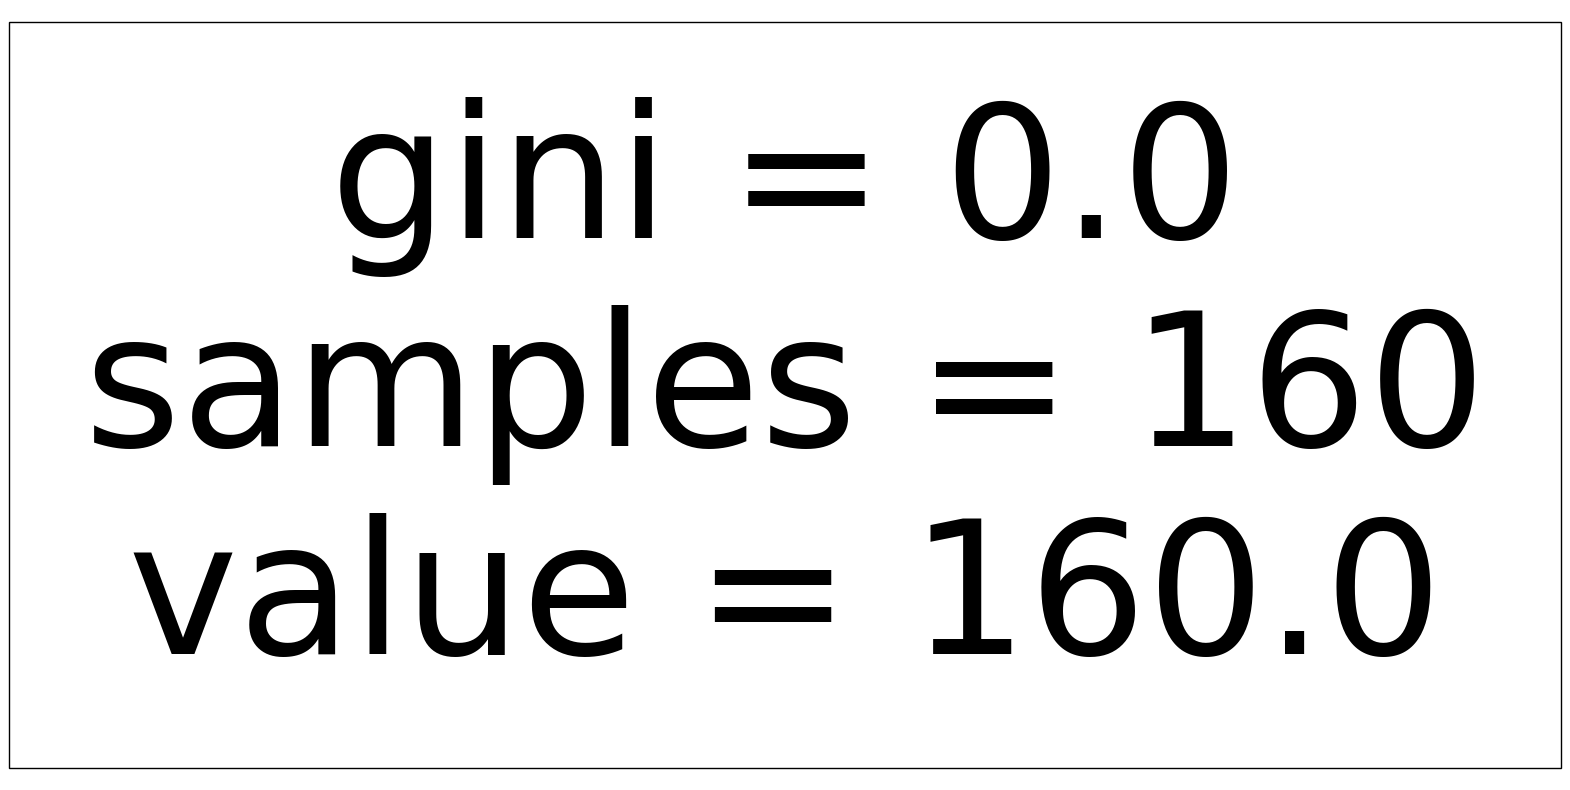

Case Type: 0.0
Case Duration (Days): 0.0
Judge Experience (Years): 0.0
Number of Witnesses: 0.0
Legal Fees (USD): 0.0
Plaintiff's Reputation: 0.0
Defendant's Wealth (USD): 0.0
Number of Evidence Items: 0.0
Number of Legal Precedents: 0.0
Settlement Offered (USD): 0.0
Severity: 0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Eksik değerleri kontrol etme
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Eksik değerleri çıkarma
data = data.dropna()

# Veri Setini Ayırma
X = features_scaled
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Kurulumu
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Modeli Değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Sonuçları Görselleştirme
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=data.columns[:-1], class_names=["Lose", "Win"], filled=True)
plt.show()

# Özelliklerin önemini gösterme
feature_importance = model.feature_importances_
for i, feature in enumerate(data.columns[:-1]):
    print(f"{feature}: {feature_importance[i]}")

**SONUÇ**

Veri setindeki tüm outcome değerleri 0 olduğundan modelin doğruluğu %100 olarak gözükmetedir. Bu nedenle precision, recall ve F1-score gibi metrikler anlamlı sonuçlar vermiyor.